In [1]:
import pandas as pd
import os

In [2]:
directory =  'Sports_Communications'
files=os.listdir(directory)
files

['Home_meet_NCSU.csv',
 'ACC_champ.csv',
 'NCAA_champ.csv',
 'Away_meet_QUAD.csv',
 'Home_meet_UNC.csv',
 'Away_meet_NCSU.csv',
 'Away_meet_UCLA.csv',
 'Home_meet_AF.csv',
 'Away_meet_PITT.csv',
 'Home_meet_PITT.csv',
 'Away_meet_UNC.csv']

In [3]:
# List to hold all dataframes
dfs = []
def normalize_columns(df):
    df.columns = df.columns.str.lower()
    return df
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath).pipe(normalize_columns)
        df['Source'] = filename
        dfs.append(df)

df.head()

,place,player,team,score,event,Source
0,1,Lauren Rutherford,Clemson,9.925,VAULT,Away_meet_UNC.csv
1,2,Kaya Forbes,UNC,9.850,VAULT,Away_meet_UNC.csv
2,3,Julia Knower,UNC,9.775,VAULT,Away_meet_UNC.csv
3,3,Molly Arnold,Clemson,9.775,VAULT,Away_meet_UNC.csv
4,3,Madison Minner,Clemson,9.775,VAULT,Away_meet_UNC.csv


In [4]:
# Concatenate all dataframes into one
combined_df = pd.concat(dfs, ignore_index=True)

In [5]:
# Mapping of event abbrevations to names
eve = {'VT': 'VAULT', 'UB': 'BARS', 'BB': 'BEAM', 'FX': 'FLOOR'}
combined_df['event'] = combined_df['event'].replace(eve)
combined_df['event'].value_counts()

BARS     164
BEAM     164
FLOOR    160
VAULT    159
Name: event, dtype: int64

In [6]:
combined_df.rename(columns = {'event.1':'fixture'}, inplace = True)

In [7]:
# Combining 'name', 'gymnast', 'player' columns into 'player/gymnast' column
combined_df['player/gymnast'] = combined_df[['name', 'gymnast', 'player']].fillna('').agg(''.join, axis=1)
# Dropping the original columns
combined_df = combined_df.drop(columns=['name', 'gymnast', 'player'])

In [8]:
combined_df.columns

Index(['round', 'order', 'team', 'event', 'score', 'difficulty', 'execution',
       'neutral deduction', 'stick bonus', 'inquiry', 'edited', 'date',
       'fixture', 'sv', 'j1', 'j2', 'Source', 'sv1', 'sv2', 'sv3', 'sv4', 'j3',
       'j4', 'place', 'player/gymnast'],
      dtype='object')

In [9]:
combined_df = combined_df.iloc[:,[0,1,24,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
combined_df.columns

Index(['round', 'order', 'player/gymnast', 'team', 'event', 'score',
       'difficulty', 'execution', 'neutral deduction', 'stick bonus',
       'inquiry', 'edited', 'date', 'fixture', 'sv', 'j1', 'j2', 'Source',
       'sv1', 'sv2', 'sv3', 'sv4', 'j3', 'j4', 'place'],
      dtype='object')

In [10]:
# Filling the values of fixture based on source

NCAA_rows = combined_df['Source'] == 'NCAA_champ.csv'
combined_df.loc[NCAA_rows, 'fixture'] = 'NCAA Gymnastics Championship \'24'

In [11]:
QUAD_rows = combined_df['Source'] == 'Away_meet_QUAD.csv'
combined_df.loc[QUAD_rows, 'fixture'] = 'QUAD'

In [12]:
NCSU_rows = combined_df['Source'] == 'Away_meet_NCSU.csv'
combined_df.loc[NCSU_rows, 'fixture'] = 'NC State vs Clemson'

In [13]:
UCLA_rows = combined_df['Source'] == 'Away_meet_UCLA.csv'
combined_df.loc[UCLA_rows, 'fixture'] = 'UCLA vs Clemson'

In [14]:
UNC_rows = combined_df['Source'] == 'Away_meet_UNC.csv'
combined_df.loc[UNC_rows, 'fixture'] = 'UNC vs Clemson'

In [15]:
#NC and CU team name matching

NC_CU = {'North Carolina State': 'NC State', 'CU':'Clemson'}
combined_df['team'] = combined_df['team'].replace(NC_CU)
combined_df['team'].value_counts()

Clemson         278
Pitt             76
UNC              75
NC State         72
Air Force        26
Iowa State       24
Oklahoma         24
Texas Womans     24
Pennsylvania     24
UCLA             24
Name: team, dtype: int64

In [16]:
combined_df['fixture'].value_counts()

ACC Gymnastics Championship '24     96
QUAD                                96
Clemson vs UNC                      58
Clemson vs Air Force                55
Pitt vs Clemson                     54
Clemson vs NC State                 48
NCAA Gymnastics Championship '24    48
NC State vs Clemson                 48
UCLA vs Clemson                     48
Clemson vs Pitt                     48
UNC vs Clemson                      48
Name: fixture, dtype: int64

In [17]:
#Adding the missing dates as per official Clemson Gymnastics Schedule

combined_df.loc[combined_df['fixture'] == 'NCAA Gymnastics Championship \'24', 'date'] = '4/4/24'
combined_df.loc[combined_df['fixture'] == 'QUAD', 'date'] = '3/3/24'
combined_df.loc[combined_df['fixture'] == 'NC State vs Clemson', 'date'] = '2/17/24'
combined_df.loc[combined_df['fixture'] == 'UCLA vs Clemson', 'date'] = '3/16/24'
combined_df.loc[combined_df['fixture'] == 'UNC vs Clemson', 'date'] = '1/26/24'

----------Merging all the combined data in single CSV----------

In [18]:
#Merging the combined data to one CSV
combined_filename = 'merged_files.csv'
combined_df.to_csv(combined_filename, index=False)

In [19]:
from IPython.display import FileLink
display(FileLink(combined_filename))

/Users/avinashsrikhakollu/merged_files.csv

----------Highest Score of UCLA----------

In [20]:
HScore = pd.DataFrame(combined_df, columns=['team', 'event', 'score'])
HScore = HScore.loc[HScore['team'] == 'UCLA']

max_score = HScore[HScore['team'] == 'UCLA']['score'].max()
max_score_events = HScore[(HScore['team'] == 'UCLA') & (HScore['score'] == max_score)]
print("UCLA scored the highest on the following events:\n")
print(max_score_events[['event', 'score']])

UCLA scored the highest on the following events:

     event  score
394  FLOOR   10.0
418   BARS   10.0
430  VAULT   10.0


----------Insights on Clemson Team/Individual Performance----------

In [21]:
Clemson_data = combined_df.loc[combined_df['team'] == 'Clemson']

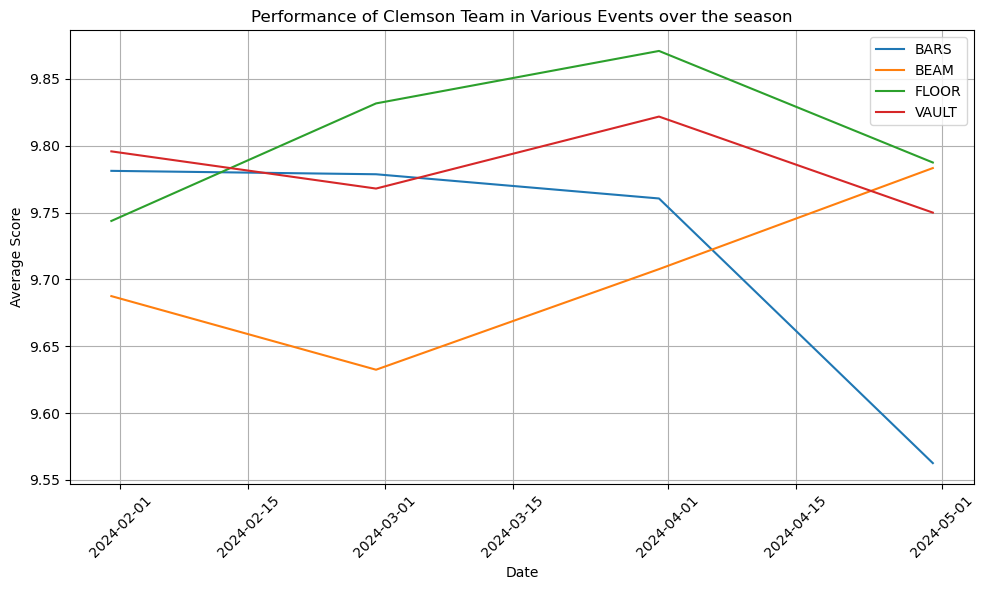

In [22]:
#Performance of Clemson Team in Various Events over the season

import pandas as pd
import matplotlib.pyplot as plt

clemson_df=Clemson_data.copy()
clemson_df['date'] = pd.to_datetime(clemson_df['date'])

grouped_df = clemson_df.groupby(['event', pd.Grouper(key='date', freq='M')])['score'].mean().reset_index()

plt.figure(figsize=(10, 6))
for event in grouped_df['event'].unique():
    event_data = grouped_df[grouped_df['event'] == event]
    plt.plot(event_data['date'], event_data['score'], label=event)

plt.title('Performance of Clemson Team in Various Events over the season')
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [23]:
#Event with the top score in each fixture for the Clemson team 

top_event_by_fixture = Clemson_data.groupby('fixture').apply(lambda x: x.loc[x['score'].idxmax()])
top_event_by_fixture[['player/gymnast','event','score']]

,player/gymnast,event,score
fixture,,,
ACC Gymnastics Championship '24,Molly Arnold,FLOOR,9.950
Clemson vs Air Force,Rebecca Wells,BEAM,9.950
Clemson vs NC State,Molly Arnold,FLOOR,9.950
Clemson vs Pitt,Brie Clark,FLOOR,9.925
Clemson vs UNC,Rebecca Wells,FLOOR,9.950
NC State vs Clemson,Rebecca Wells,BEAM,9.950
NCAA Gymnastics Championship '24,Kaitlin DeGuzman,BARS,9.900
Pitt vs Clemson,Rebecca Wells,BEAM,9.925
QUAD,Madison Minner,VAULT,9.900


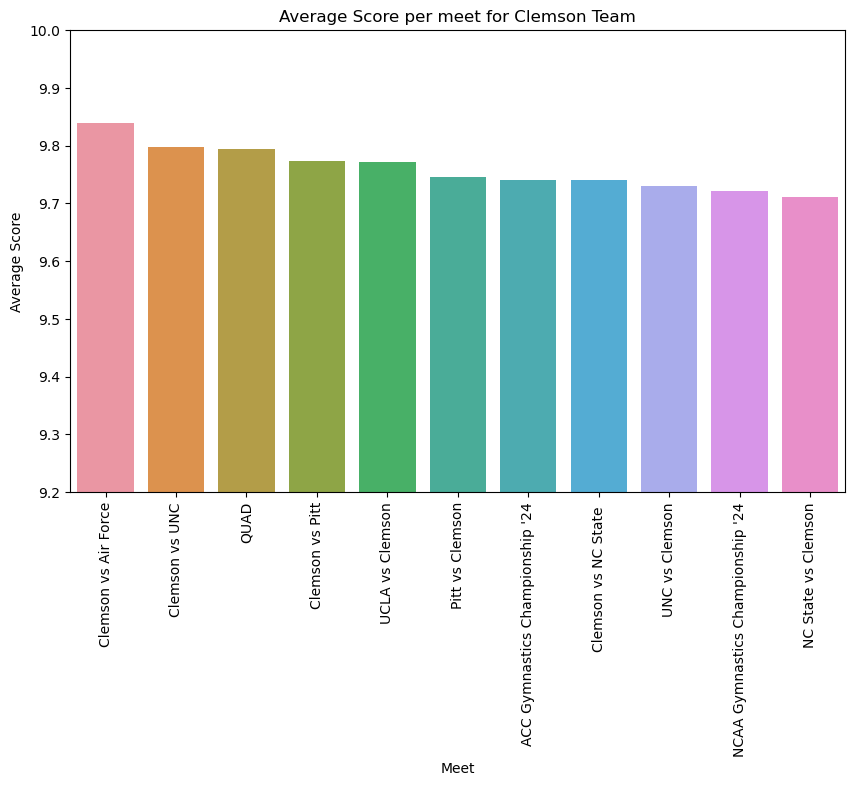

In [24]:
#Average score of Clemson for each meet 

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='fixture', y='score', data=Clemson_data, order=Clemson_data.groupby('fixture')['score'].mean().sort_values(ascending=False).index, errorbar=None)
plt.title('Average Score per meet for Clemson Team')
plt.xlabel('Meet')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.ylim(9.2, 10)
plt.show()

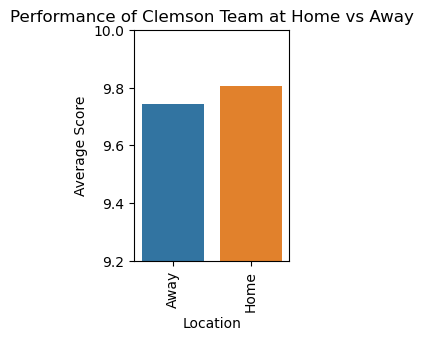

In [25]:
#Performance of Clemson Team at Home vs Away

import numpy as np
cd=Clemson_data.copy()
cd.loc[:, 'home/away'] = np.where((cd['fixture'] == 'Clemson vs NC State') | (cd['fixture'] == 'Clemson vs UNC') 
                                  | (cd['fixture'] == 'Clemson vs Air Force') | (cd['fixture'] == 'Clemson vs Pitt')
                                  | (cd['fixture'] == 'Clemson vs Pitt'),
                                  'Home', 'Away')
average_score_by_location = cd.groupby('home/away')['score'].mean()
(average_score_by_location)

plt.figure(figsize=(2, 3))
sns.barplot(x='home/away', y='score', data=cd, errorbar=None)
plt.title('Performance of Clemson Team at Home vs Away')
plt.xlabel('Location')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.ylim(9.2, 10) 
plt.show()

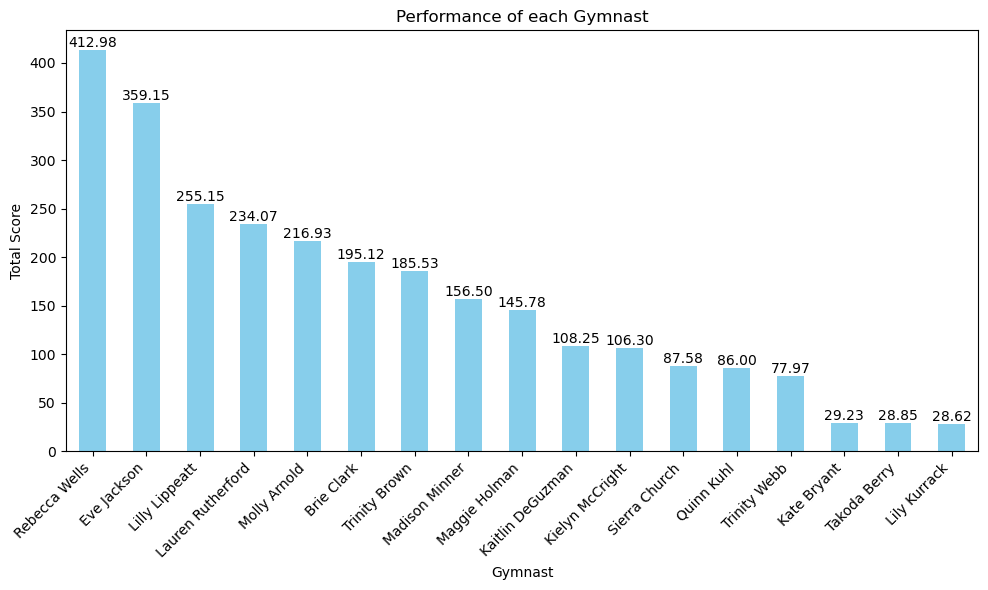

In [26]:
# Performance of each Gymnast

individual_performance = Clemson_data.groupby('player/gymnast')['score'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = individual_performance.plot(kind='bar', color='skyblue')
individual_performance.plot(kind='bar', color='skyblue')
plt.title('Performance of each Gymnast')
plt.xlabel('Gymnast')
plt.ylabel('Total Score')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(individual_performance):
    ax.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

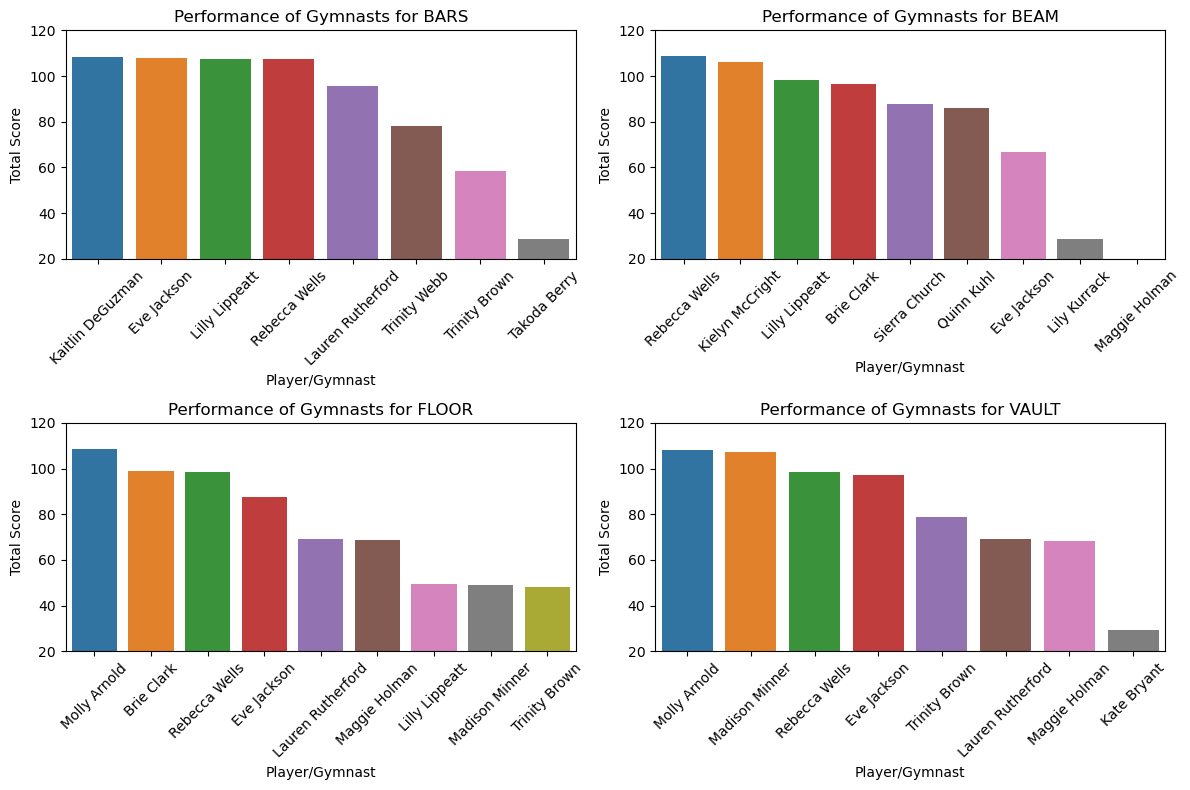

In [27]:
#Performance of each gymnast in every event

event_player_score = Clemson_data.groupby(['event', 'player/gymnast'])['score'].sum().reset_index()
plt.figure(figsize=(12, 8))
for i, event in enumerate(event_player_score['event'].unique(), 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='player/gymnast', y='score', data=event_player_score[event_player_score['event'] == event],
                order=event_player_score[event_player_score['event'] == event].sort_values(by='score', ascending=False)['player/gymnast'])
    plt.title(f'Performance of Gymnasts for {event}')
    plt.xlabel('Player/Gymnast')
    plt.ylabel('Total Score')
    plt.xticks(rotation=45)
    plt.ylim(20, 120)
    plt.tight_layout()

plt.show()


In [28]:
#Correlation between Score and Difficulty

Clemson_data['score'].corr(Clemson_data['difficulty'])

0.8066366215320555

The strong correlation between difficulty and score indicates the high dependancy of score on difficulty.